# 교재 파이썬 코드
https://github.com/sunkyoo/opencv4cvml/tree/master/python

# Image란?

## Image는 width X height X channel 의 pixels로 이루어진 matrix(배열)

- width: 너비로 이미지의 가로 길이를 의미한다.
- height: 높이로 이미지의 세로 길이를 의미한다.

- pixel: image가 가지고 있는 값으로 width X height 개수만큼 존재한다. image를 표현하는 bit방식에 따라 값의 범위가 달라진다.

- 일반적인 Image는 unsigned integer 8bit로 표현
    - 0 ~ 255 로 표현: 0이 black
- bit수가 높아질 수록 표현할 수 있는 색의 범위가 증가한다.   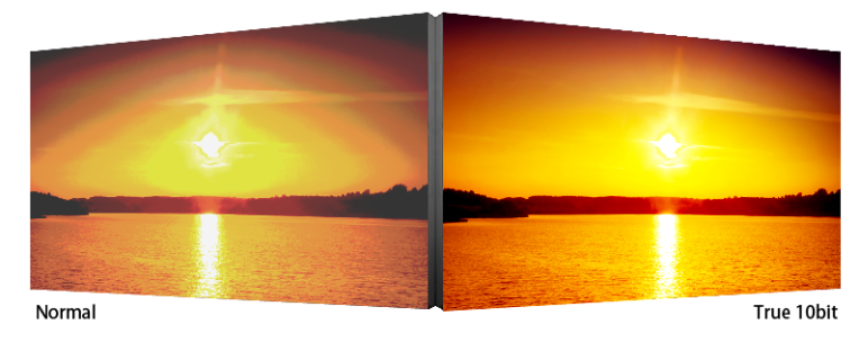

# Open CV 개요
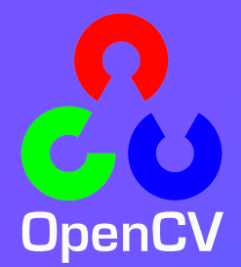

- https://opencv.org/
- 튜토리얼: https://docs.opencv.org/master/
- Open Source Computer Vision Library로 실시간 computer vision을 목적으로 개발됨
- Intel에서 개발하다가 open source화 됨
- Cross Platform이기 때문에 Windows, Mac, Linux, OS에 상관없이 동작 가능
- C/C++로 개발 되었으나 Python, JAVA, MATLAB의 개발 환경도 지원한다.
- 실시간에 초점을 맞추고 나온 library이기 때문에 mobile camera나 로봇 등에 recognition module로 붙여 영상처리에 활용된다.
- 속도가 빠르다.
- 함수 지향

# OpenCV 설치

- `!pip install opencv-contrib-python`

In [1]:
import cv2
import numpy as np

# 이미지 읽기
- **`imread(filename [, flag]) : ndarray`**
    - 이미지를 읽는다.
        
    - filename: 읽어들일 이미지 파일경로
    - flag: 읽기 모드
        - cv2.IMREAD_XXXXX 상수를 이용한다.
        - IMREAD_COLOR가 기본(BGR 모드)
            - matplotlib에서 출력시 rgb 모드로 변환해야 한다.

In [2]:
lenna = cv2.imread("images/Lenna.png")   # 이미지를 ndarray로 읽어들인다

In [3]:
print(type(lenna))
print(lenna.shape)   # (height, width, channel)

<class 'numpy.ndarray'>
(512, 512, 3)


In [4]:
cv2.imshow("Lenna", lenna)
cv2.waitKey(0)   # 키보드의 키를 누를 때까지 기다리면서 이미지를 띄운다. 괄호 안은 입력을 기다리는 밀리초. 0을 주면 계속 대기
cv2.destroyAllWindows()   # 이미지를 띄운 모든 윈도우들을 종료시킨다.

### matplotlib 으로 출력
- jupyter notebook 내에 출력이 가능
- plt.imshow(ndarray)

In [5]:
# %matplotlib qt5
# %matplotlib inline

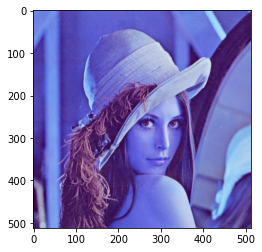

In [5]:
import matplotlib.pyplot as plt
# 맷플롯립은 RGB 모드로 읽어들임(Red, Green, Blue)
# openCV는 BGR 모드로 읽어들임
plt.imshow(lenna)
plt.show()

## 색공간 변환
- **`cv2.cvtColor(src, code)`**
    - image 의 color space를 변환한다. 
    - src: 변환시킬 이미지 (ndarray)
    - code
        - 변환시킬 색공간 타입 지정
        - cv2.COLOR_XXX**2**YYY 형태의 상수 지정(XXX를YYY로 변환)
            - cv2.COLOR_XXX2YYY 형태의 상수 지정(XXX를YYY로 변환)
            - cv2.COLOR_BGR2GRAY / cv2.COLOR_GRAY2BGR (BGR <-> GRAY)
            - cv2.COLOR_BGR2RGB  / cv2.COLOR_RGB2BGR  (BGR <-> RGB)
            - cv2.COLOR_BGR2HSV  / cv2.COLOR_HSV2BGR  (BGR <-> HSV)

> ### HSV
> - Hue: 색상, 색의 종류
> - Saturation: 채도. 색의 선명도
> - Value : 명도. 밝기

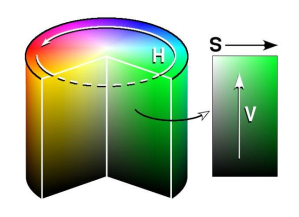
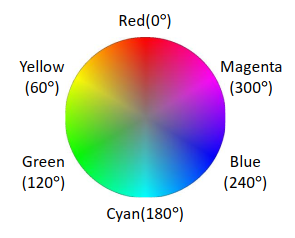

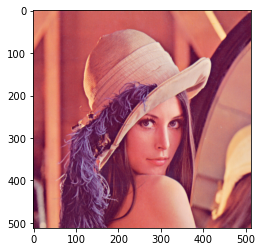

In [6]:
plt.imshow(lenna[:, :, ::-1])   # 블루와 레드의 위치를 바꾸기
plt.show()

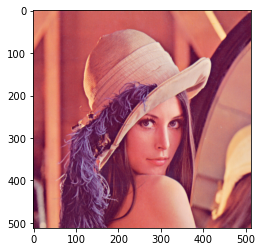

In [7]:
lenna_rgb = cv2.cvtColor(lenna, cv2.COLOR_BGR2RGB)
plt.imshow(lenna_rgb)
plt.show()

In [9]:
cv2.imshow("frame", lenna_rgb)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [10]:
lenna_gray = cv2.cvtColor(lenna, cv2.COLOR_BGR2GRAY)
cv2.imshow("gray", lenna_gray)
cv2.waitKey(0)
cv2.destroyAllWindows()
print(lenna_gray.shape)

(512, 512)


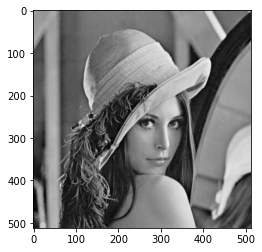

In [11]:
plt.imshow(lenna_gray, cmap='gray')
plt.show()

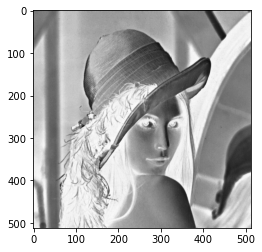

In [17]:
plt.imshow(lenna_gray, cmap='Greys')
plt.show()

In [10]:
lenna_gray

array([[162, 162, 162, ..., 170, 155, 128],
       [162, 162, 162, ..., 170, 155, 128],
       [162, 162, 162, ..., 170, 155, 128],
       ...,
       [ 43,  43,  50, ..., 104, 100,  98],
       [ 44,  44,  55, ..., 104, 105, 108],
       [ 44,  44,  55, ..., 104, 105, 108]], dtype=uint8)

In [11]:
lenna

array([[[125, 137, 226],
        [125, 137, 226],
        [133, 137, 223],
        ...,
        [122, 148, 230],
        [110, 130, 221],
        [ 90,  99, 200]],

       [[125, 137, 226],
        [125, 137, 226],
        [133, 137, 223],
        ...,
        [122, 148, 230],
        [110, 130, 221],
        [ 90,  99, 200]],

       [[125, 137, 226],
        [125, 137, 226],
        [133, 137, 223],
        ...,
        [122, 148, 230],
        [110, 130, 221],
        [ 90,  99, 200]],

       ...,

       [[ 60,  18,  84],
        [ 60,  18,  84],
        [ 58,  27,  92],
        ...,
        [ 84,  73, 173],
        [ 76,  68, 172],
        [ 79,  62, 177]],

       [[ 57,  22,  82],
        [ 57,  22,  82],
        [ 62,  32,  96],
        ...,
        [ 79,  70, 179],
        [ 81,  71, 181],
        [ 81,  74, 185]],

       [[ 57,  22,  82],
        [ 57,  22,  82],
        [ 62,  32,  96],
        ...,
        [ 79,  70, 179],
        [ 81,  71, 181],
        [ 81,  74, 185]]

## 채널 확인
- 채널별로 나눠 이미지 출력

In [13]:
# lenna 원래 BGR
blue, green, red = cv2.split(lenna)
blue.shape, green.shape, red.shape
# blue = lenna[:, :, 0]
# green = lenna[:, :, 1]
# red = lenna[:, :, 2]

((512, 512), (512, 512), (512, 512))

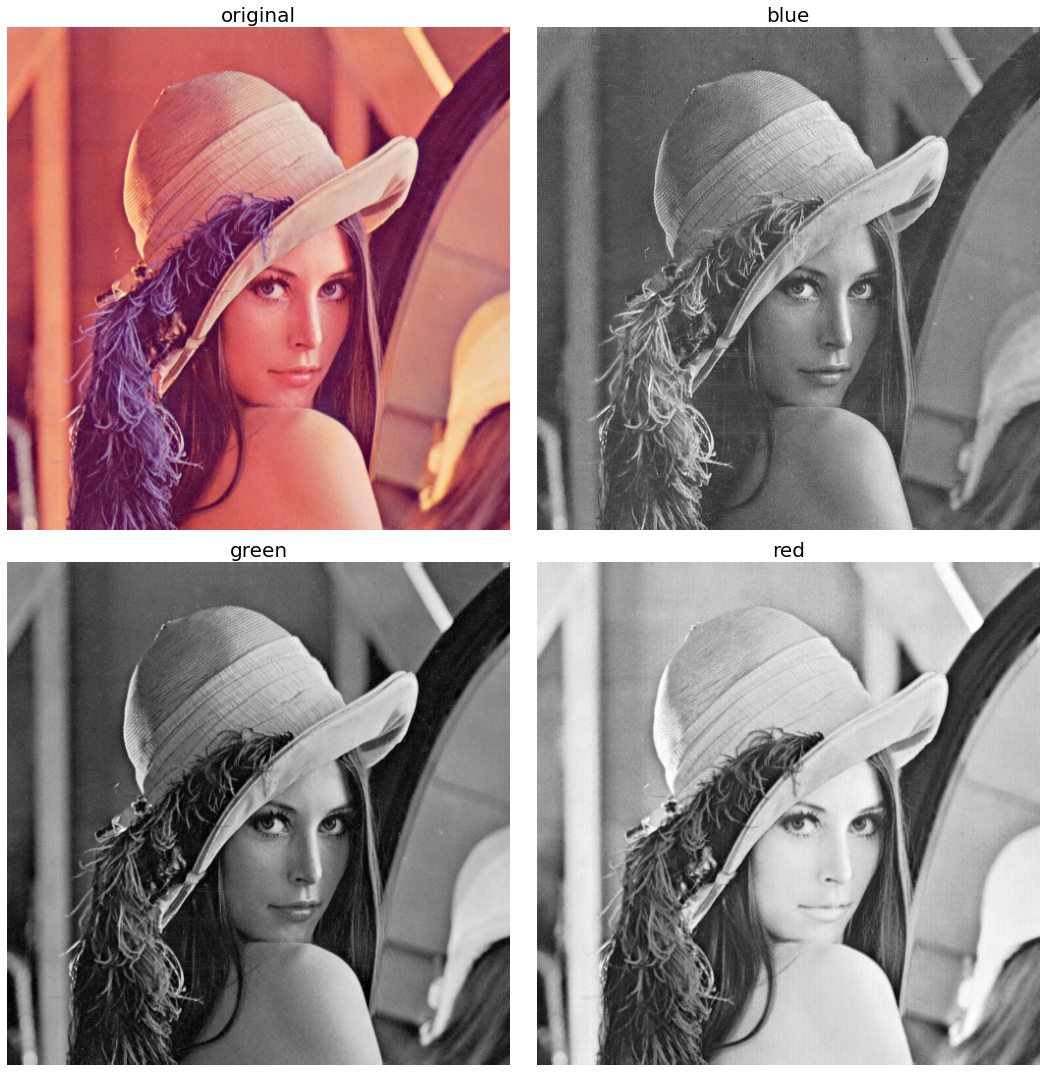

In [17]:
plt.figure(figsize = (15,15))
plt.subplot(2, 2, 1)
plt.title("original", fontsize = 20)
plt.imshow(lenna[:,:,::-1])   # BGR -> RGB

plt.axis('off')

plt.subplot(2, 2, 2)
plt.title("blue", fontsize = 20)
plt.imshow(blue, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title("green", fontsize = 20)
plt.imshow(green, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title("red", fontsize = 20)
plt.imshow(red, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()



## cv2에서 이미지 출력
- **`cv2.imshow(winname, mat)`**
    - 창을 띄워 이미지를 출력한다.
    - winname: 창 이름
        - 창이름이 같으면 같은 창에 띄운다.
    - mat: 출력할 이미지(ndarray)
        - dtype이 uint8이어야 정상 출력된다. (float일 경우 255를 곱해서 출력한다.)
- **`cv2.imwrite(filename, img): bool`**
    - 이미지 파일로 저장
    - filename: 저장할 파일경로
    - img: 저장할 이미지(ndarray)

In [18]:
lenna.dtype

dtype('uint8')

In [19]:
# 윈도우를 열어서 lenna 변수의 ndarray를 이미지로 보여주는 함수
cv2.imshow("Image", lenna)
cv2.waitKey(0)   # 다음 줄 코드로 넘어가지 않도록 key 입력을 대기시킨다. 반환값은 입력된 키 값.
cv2.imshow("Frame", lenna_gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [27]:
# 특정 키를 누르면 종료되도록 처리
cv2.imshow('img', lenna)

while True:
#     n = cv2.waitKey(0)
#     print(n)
    if cv2.waitKey(0) == 27:   # 27 = esc -> esc를 눌렀을 때만 종료
        break

cv2.destroyAllWindows()

114
113
119
101
114
116
121
97
98
99
100
101
102
103
103
27


In [26]:
ord('q')   # 입력받은 문자를 정수로 변환

113

In [29]:
ord('가')   # 10진수 변환

44032

## 파일로 저장
cv2.imwrite('파일명', 배열)

In [31]:
cv2.imwrite('lg.jpg', lenna_gray)

True

In [32]:
cv2.imwrite('output/lg.jpg', lenna_gray)  # 없는 디렉토리에 저장하면 저장 안 되고 False 반환

False

In [33]:
# 특정 디렉토리에 저장할 경우
# 디렉토리가 있는지 확인. 파일은 확인 불가
import os
os.path.isdir('output')

False

In [34]:
os.path.isdir('images')

True

In [35]:
# 디렉토리 생성
if not os.path.isdir('output'):
    os.mkdir('output')

cv2.imwrite('output/lg.jpg', lenna_gray)

True

In [42]:
# 파일 저장 경로 만들어주는 함수
os.path.join("src", "python", "test.py")

'src\\python\\test.py'

In [43]:
base_dir = "src"
py_dir = os.path.join(base_dir, 'python')
java_dir = os.path.join(base_dir, 'java')
print(py_dir, java_dir)

src\python src\java


# 동영상 처리

## 동영상 읽기
- VideoCapture 클래스사용
    - 객체 생성
        - VideoCapture('동영상파일 경로'): 동영상파일
        - VideoCapture(웹캠 ID): 웹캠
- VideoCapture의 주요 메소드
    - isOpened(): bool
        - 입력 대상과 연결되었는지 여부반환
    - read(): (bool, img)
        - Frame 이미지로 읽기
        - 반환값
            - bool: 읽었는지 여부
            - img: 읽은 이미지(ndarray)
- openCV에서는 camel case를 쓴다...

### 웹캠

In [40]:
import cv2

cap = cv2.VideoCapture(0)   # 정수: 연결하려는 webcam id (0 ~), 문자열(동영상 파일 경로)을 줄 수도 있음.

# 연결 성공 여부 확인. True/False
if cap.isOpened() == False:
    print('웹캠 연결 실패')
    exit(1)   # 프로그램 종료 - 종료코드 0: 정상종료, 양수/음수: 비정상종료

# 웹캠으로부터 영상 읽기
# 웹캠에서 입력되는 이미지들을 캡쳐해서 화면에 보여주기(imshow())
while True:
    # 한 장의 이미지를 캡쳐 (한 번 반복 시마다 한 장씩 캡쳐)
    ret, img = cap.read()   # ret: 캡쳐 성공(읽었는지) 여부, img: 읽은 이미지의 ndarray
    
    img = cv2.flip(img, 1)
    # flip(이미지 배열, 모드): 반전된 배열 반환
    # 모드가 양수: 좌우반전
    # 모드가 0: 상하반전
    # 모드가 음수: 상하좌우 반전
    
    if ret == False:
        print('캡쳐 실패')
        break   # 캡쳐 종료
    
    cv2.imshow('frame', img)
    if cv2.waitKey(1) == 27:   # ESC 클릭 시 종료
        break
        
# end of while
cap.release()   # 웹캠 연결 닫기
cv2.destroyAllWindows()

In [45]:
# todo: 웹캠 영상을 이미지로 저장
# output_capture/cap_번호.jpg

# 파일 저장 디렉토리 생성
base_dir = 'output_capture'
if not os.path.isdir(base_dir):
    os.mkdir(base_dir)

# webcam 연결
cap = cv2.VideoCapture(0)
if cap.isOpened() == False:
    print('웹캠 연결 실패')
    exit(1)
    
# 캡쳐 작업
count = 1   # 파일명에 붙일 번호
while True:
    
    ret, frame = cap.read()
    if ret == False:
        print('캡쳐 실패')
        break
    
    # 반전
    frame = cv2.flip(frame, 1)
    
    # 화면 출력
    cv2.imshow('frame', frame)
    
    # 파일로 저장 - 캡쳐 100장 당 한 장씩 저장
    if count % 100 == 0:
        file_path = os.path.join(base_dir, f"cap_{count}.jpg")
        cv2.imwrite(file_path, frame)
    count += 1
    
    if cv2.waitKey(1) > 0:   # 아무 키나 눌러도 나가게 >0
        break
        
cap.release()   # 연결 닫기
cv2.destroyAllWindows()

### 동영상 파일 읽기
- images/wave.mp4
- fps: frame per second 초당 프레임
    - 1초에 몇 장의 이미지를 보여주는지 수치

In [49]:
import cv2
import os

cap = cv2.VideoCapture('images/wave.mp4')   # 동영상 파일과 연결 시 경로 지정

if not cap.isOpened():
    print('로딩 실패')
    exit(1)

# fps 조회
fps = cap.get(cv2.CAP_PROP_FPS)   # 객체.get(상수): 연결된 동영상 소스로부터 상수와 관련된 정보를 반환
print(fps)
delay = round(1000/fps)   # 어느 시간에 한 번씩 캡쳐할 지 계산. 정수로 만들기 위해 반올림 처리

# 읽기
while True:
    ret, frame = cap.read()
    if not ret:
        print('캡쳐 실패')
        break
    
    # 캡쳐된 영상 화면 출력
    cv2.imshow('wave', frame)
    if cv2.waitKey(delay) == 27:
        break

cap.release()
cv2.destroyAllWindows()

29.97002997002997


### 동영상 저장
- capture(read)한 이미지 프레임을 연속적으로 저장하면 동영상 저장이 된다.
- VideoWriter 객체를 이용해 저장
    - **`VideoWriter(filename, codec, fps, size)`**
        - filename: 저장경로
        - codec
            - VideoWriter_fourcc 이용
            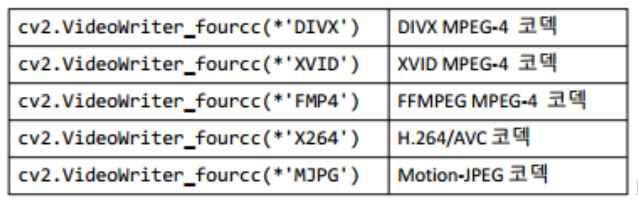
        - fps
            - FPS (Frame Per Second) - 초당 몇 프레임인지 지정
        - size
            - 저장할 frame 크기로 원본 동영상이나 웹캠의 width, height 순서로 넣는다.
    - `VideoWriter().write(img)`
        - Frame 저장

In [60]:
# 웹캠에서 캡쳐한 프레임을 동영상 파일로 저장
import cv2
import os

cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print('웹캠 연결 실패')
    exit(1)
    
# Frame 1장 read(): 이미지 size 조회 위함
ret, img = cap.read()
if not ret:
    print('캡쳐 실패')
    exit(1)
    
# print(img.shape)   # (480, 640, 3)
height = img.shape[0]
width = img.shape[1]

# webcam fps 조회
fps = cap.get(cv2.CAP_PROP_FPS)
# print(fps)   # 30

# 코덱 생성
codec = cv2.VideoWriter_fourcc(*'MJPG')   # mp4 코덱
writer = cv2.VideoWriter('output/webcam_output.avi', codec, fps, (width, height))

if not writer.isOpened():
    print('저장 실패')
    exit(1)

# VideoCapture로 frame을 읽어서 VideoWriter로 파일에 출력
while True:
    ret, frame = cap.read()
    if not ret:
        print('캡쳐 실패')
        exit(1)
    
    # 화면 출력
    cv2.imshow('frame', frame)
    # 파일 저장
    writer.write(frame)
    
    if cv2.waitKey(1) == 27:
        break

cap.release()
writer.release()
cv2.destroyAllWindows()

In [54]:
print(*'mebiwds')  # 한 글자씩 담긴 리스트 ['d', 'd']

m e b i w d s


In [55]:
def test(*args):
    print(args)

In [57]:
test('a', 'b', 'c')

('a', 'b', 'c')


In [58]:
test(*['a', 'a', 'dd'])  # 값을 하나씩 풀어주는게 아시타...

('a', 'a', 'dd')


In [59]:
test(['a', 'a', 'dd'])

(['a', 'a', 'dd'],)
